In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import time
from datetime import  datetime
%matplotlib inline
sns.set()  
%matplotlib inline    

# 这里尝试一些开仓指标

In [2]:
back_test = pd.read_excel('/Users/回测数据.xlsx' , parse_dates=True)

计算移动分位数，每日计算前20天的分位数

In [3]:
sig1 = back_test.drop_duplicates(subset=['date'])

In [4]:
percentage_vix_up = []
percentage_vix_low = []

In [5]:
def signal_vix(data):
    a = data.quantile(0.95)
    b = data.quantile(0.05)
    percentage_vix_up.append(a)
    percentage_vix_low.append(b)
    return a

In [6]:
sig1['vix/gv'].rolling(20).apply(signal_vix)

0              NaN
106            NaN
212            NaN
320            NaN
428            NaN
            ...   
110867    0.100033
110868    0.100033
110869    0.100033
110870    0.100033
110871    0.100033
Name: vix/gv, Length: 941, dtype: float64

In [7]:
percentage_bs_up = []
percentage_bs_low = []

In [8]:
def signal_bs(data):
    a = data.quantile(0.95)
    b = data.quantile(0.05)
    percentage_bs_up.append(a)
    percentage_bs_low.append(b)
    return a

In [9]:
sig1['bs/gv'].rolling(20).apply(signal_bs)

0              NaN
106            NaN
212            NaN
320            NaN
428            NaN
            ...   
110867    0.086183
110868    0.086183
110869    0.086183
110870    0.086183
110871    0.086183
Name: bs/gv, Length: 941, dtype: float64

In [10]:
zero = []
for i in range(19):
    zero.append(0)


In [11]:
percentage_vix_up_z = pd.DataFrame(zero , columns = ['percentage_vix_up'])
percentage_vix_low_z = pd.DataFrame(zero , columns = ['percentage_vix_low'])
percentage_bs_up_z = pd.DataFrame(zero , columns = ['percentage_bs_up'])
percentage_bs_low_z = pd.DataFrame(zero , columns = ['percentage_bs_low'])

In [12]:
percentage_vix_up = pd.DataFrame(percentage_vix_up , columns = ['percentage_vix_up'])
percentage_vix_low = pd.DataFrame(percentage_vix_low , columns = ['percentage_vix_low'])
percentage_bs_up = pd.DataFrame(percentage_bs_up , columns = ['percentage_bs_up'])
percentage_bs_low = pd.DataFrame(percentage_bs_low , columns = ['percentage_bs_low'])

In [13]:
percentage_vix_up = pd.concat([percentage_vix_up_z , percentage_vix_up])
percentage_vix_low = pd.concat([percentage_vix_low_z , percentage_vix_low])
percentage_bs_up = pd.concat([percentage_bs_up_z , percentage_bs_up])
percentage_bs_low = pd.concat([percentage_bs_low_z , percentage_bs_low])

In [14]:
date = sig1['date']
date = pd.DataFrame(date , columns = ['date'])
date.index = range(941)

In [15]:
percentage_vix_up.index = range(941)
percentage_vix_low.index = range(941)
percentage_bs_up.index = range(941)
percentage_bs_low.index = range(941)

In [16]:
signal = date.join(percentage_vix_up)
signal = signal.join(percentage_vix_low)
signal = signal.join(percentage_bs_up)
signal = signal.join(percentage_bs_low)

In [17]:
signal

,date,percentage_vix_up,percentage_vix_low,percentage_bs_up,percentage_bs_low
0,2017-01-03,0.000000,0.000000,0.000000,0.000000
1,2017-01-04,0.000000,0.000000,0.000000,0.000000
2,2017-01-05,0.000000,0.000000,0.000000,0.000000
3,2017-01-06,0.000000,0.000000,0.000000,0.000000
4,2017-01-09,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
936,2020-11-10,0.100033,0.088736,0.086183,0.077487
937,2020-11-11,0.100033,0.088736,0.086183,0.077487
938,2020-11-12,0.100033,0.088736,0.086183,0.077487
939,2020-11-13,0.100033,0.087822,0.086183,0.073319


比值大于95%分位数时卖空，小于5%做多

In [18]:
sig1.set_index('date')

,Unnamed: 0,code,expire,type,strike,settle,Delta,Gamma,Vega,Theta,Rho,BS_IV,ivix,garch_volatility,close,vix/gv,bs/gv,t_days,strike_gap
date,,,,,,,,,,,,,,,,,,,
2017-01-03,0,10000671,2017-03-22,C,2.055,0.2564,1.000,0.0000,0.0000,-0.0600,0.4420,0.150294,0.160050,0.493903,2.307,0.324051,0.304299,NaN,NaN
2017-01-04,106,10000671,2017-03-22,C,2.055,0.2700,1.000,0.0000,0.0000,-0.0600,0.4370,0.134390,0.147191,0.503243,2.325,0.292485,0.267048,NaN,NaN
2017-01-05,212,10000671,2017-03-22,C,2.055,0.2670,1.000,0.0000,0.0000,-0.0600,0.4310,0.129275,0.147489,0.490133,2.322,0.300917,0.263756,NaN,NaN
2017-01-06,320,10000671,2017-03-22,C,2.055,0.2590,1.000,0.0000,0.0000,-0.0600,0.4260,0.129712,0.145717,0.486173,2.314,0.299722,0.266802,NaN,NaN
2017-01-09,428,10000671,2017-03-22,C,2.055,0.2659,1.000,0.0000,0.0000,-0.0600,0.4090,0.124750,0.141530,0.477071,2.319,0.296664,0.261491,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,110867,10002477,2020-12-23,C,2.600,0.8600,1.000,0.0000,0.0000,-0.0002,0.0031,0.195453,0.229688,2.369656,3.466,0.096929,0.082482,NaN,NaN
2020-11-11,110868,10002477,2020-12-23,C,2.600,0.8677,0.989,0.0641,0.0003,-0.0004,0.0029,0.191240,0.224143,2.366107,3.464,0.094731,0.080825,NaN,NaN
2020-11-12,110869,10002477,2020-12-23,C,2.600,0.8390,1.000,0.0000,0.0000,-0.0002,0.0029,0.185568,0.219729,2.374272,3.447,0.092546,0.078158,NaN,NaN


In [19]:
back_test = pd.merge(back_test , signal , on = ['date'] , how = 'left')
back_test.set_index(['date'])

,Unnamed: 0,code,expire,type,strike,settle,Delta,Gamma,Vega,Theta,...,garch_volatility,close,vix/gv,bs/gv,t_days,strike_gap,percentage_vix_up,percentage_vix_low,percentage_bs_up,percentage_bs_low
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0,10000671,2017-03-22,C,2.055,0.2564,1.0000,0.0000,0.0000,-0.0600,...,0.493903,2.307,0.324051,0.304299,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2017-01-03,1,10000672,2017-03-22,C,2.104,0.2115,1.0000,0.0000,0.0000,-0.0610,...,0.493903,2.307,0.324051,0.304299,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2017-01-03,2,10000673,2017-03-22,C,2.153,0.1703,0.9450,1.0050,0.1190,-0.0870,...,0.493903,2.307,0.324051,0.304299,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2017-01-03,3,10000674,2017-03-22,C,2.202,0.1332,0.8170,1.8980,0.2840,-0.1360,...,0.493903,2.307,0.324051,0.304299,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2017-01-03,4,10000675,2017-03-22,C,2.250,0.1017,0.6950,2.3130,0.3760,-0.1660,...,0.493903,2.307,0.324051,0.304299,NaN,NaN,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,121448,10002912,2021-06-23,P,3.900,0.5527,-0.5994,0.4498,0.0105,-0.0004,...,2.369656,3.466,0.096929,0.082482,NaN,NaN,0.100033,0.088736,0.086183,0.077487
2020-11-11,121449,10002912,2021-06-23,P,3.900,0.5453,-0.6056,0.4603,0.0104,-0.0004,...,2.366107,3.464,0.094731,0.080825,NaN,NaN,0.100033,0.088736,0.086183,0.077487
2020-11-12,121450,10002912,2021-06-23,P,3.900,0.5613,-0.6168,0.4589,0.0103,-0.0004,...,2.374272,3.447,0.092546,0.078158,NaN,NaN,0.100033,0.088736,0.086183,0.077487


筛选每天符合标准的期权：平值C、P各一个，期限最长

In [20]:
def largest_option(x):
    ts = list(set(x))
    ts.sort()
    return ts[-1]

In [21]:
def atm_option(x):
    pg = list(set(x))
    pg.sort()
    return pg[0]

In [22]:
def select_option(data):
    
    #先将期权分为C、P两组
    calls = data[data['type'] == 'C']
    puts = data[data['type'] == 'P']
    #重命名行权价
    calls.rename(columns={'settle': 'call'}, inplace=True)
    puts.rename(columns={'settle': 'put'}, inplace=True)
    #合并两个表格
    option = pd.merge(calls, puts.loc[:, ['date', 'expire', 'strike', 'put' , 'BS_IV','ivix',
                                           'garch_volatility','close','vix/gv','bs/gv',
                                           'percentage_vix_up','percentage_vix_low',
                                           'percentage_bs_up','percentage_bs_low']], 
                        on=['date', 'expire', 'strike' , 'BS_IV','ivix',
                            'garch_volatility','close','vix/gv','bs/gv',
                            'percentage_vix_up','percentage_vix_low',
                            'percentage_bs_up','percentage_bs_low'], 
                        how='left').drop_duplicates()
    
    #计算剩余到期日
    option['maturity'] = (option['expire'] - option['date']).apply(lambda x: x.days)
    
    #计算平值程度
    option['strike_gap'] = abs(option['strike'] - option['close'])
    
    #将两个指标筛选出来
    largest_maturities = option.groupby('date')['maturity'].apply(largest_option)
    atm_options = option.groupby('date')['strike_gap'].apply(atm_option)
    #合并
    slice_targ = pd.concat([largest_maturities , atm_options] , axis = 1 , keys = ['largest_maturity' , 'atm_option'])
    options = pd.merge(option , slice_targ , on = 'date' , how = 'left')
    #根据指标筛选期权
    back_test_options = options[(options['maturity'] == options['largest_maturity'])&(options['strike_gap'] == options['atm_option'])]
    
    return back_test_options

In [23]:
back_test_data = select_option(back_test)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
bt_data = back_test_data.loc[:,['date','close','call','put','BS_IV','ivix',
                                'garch_volatility','vix/gv','bs/gv','percentage_vix_up',
                                'percentage_vix_low','percentage_bs_up','percentage_bs_low','maturity']]

In [34]:
bt_data.set_index('date' , inplace = True)

<AxesSubplot:xlabel='date'>

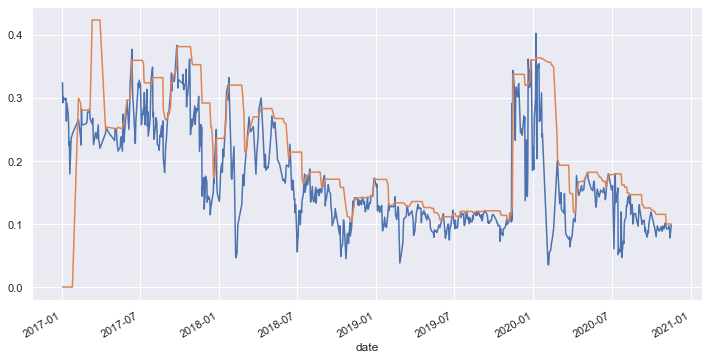

In [27]:
bt_data.groupby('date')['vix/gv'].mean().plot(figsize = (12 , 6))
bt_data.groupby('date')['percentage_vix_up'].mean().plot()

In [38]:
bt_data.sort_index(inplace = True)

In [60]:
bt_data['20MA'] = bt_data['vix/gv'].rolling(20).mean()
bt_data['sigma20'] = bt_data['vix/gv'].rolling(20).std()
bt_data['bolling_up'] = bt_data['20MA'] + 2*bt_data['sigma20']
bt_data['bolling_low'] = bt_data['20MA'] - 2*bt_data['sigma20']

<AxesSubplot:xlabel='date'>

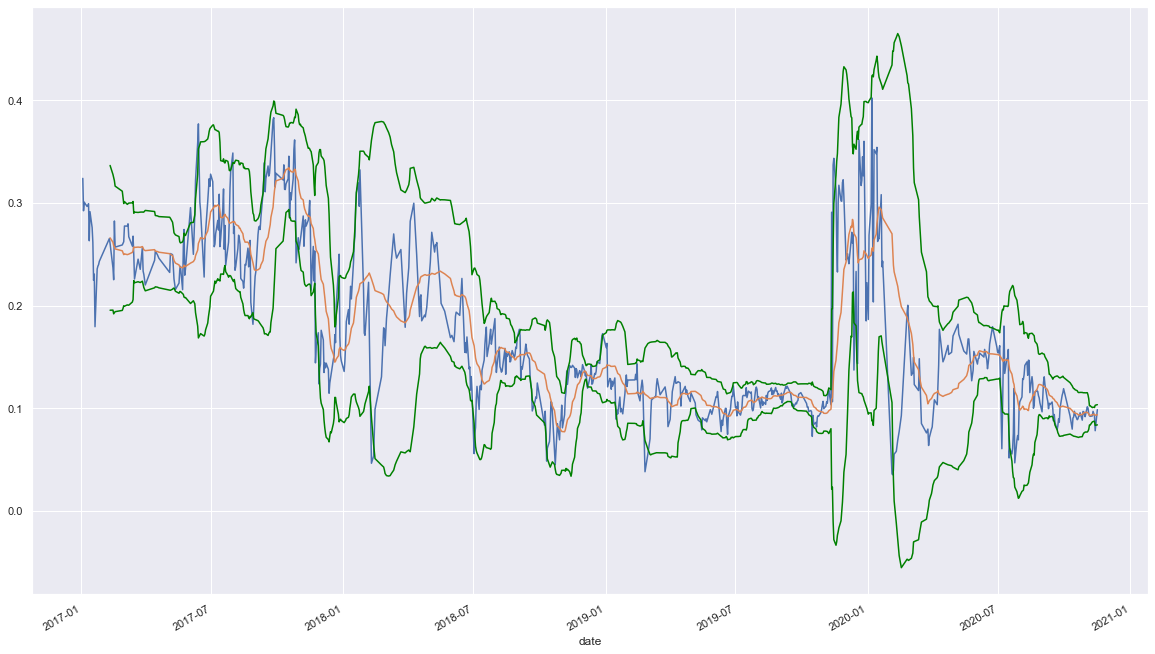

In [62]:
bt_data.groupby('date')['vix/gv'].mean().plot(figsize = (20 , 12))
bt_data.groupby('date')['20MA'].mean().plot()
bt_data.groupby('date')['bolling_up'].mean().plot(color = 'green')
bt_data.groupby('date')['bolling_low'].mean().plot(color = 'green')